In [5]:
import numpy
import cv2
import os
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


In [69]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [70]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [71]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [72]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               48128     
__________

In [74]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# model.save('cnn_model.h5')
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 141s - loss: 0.3870 - acc: 0.8820 - val_loss: 0.0916 - val_acc: 0.9711
Epoch 2/10
 - 152s - loss: 0.0991 - acc: 0.9699 - val_loss: 0.0551 - val_acc: 0.9826
Epoch 3/10
 - 161s - loss: 0.0731 - acc: 0.9769 - val_loss: 0.0423 - val_acc: 0.9873
Epoch 4/10
 - 151s - loss: 0.0599 - acc: 0.9817 - val_loss: 0.0365 - val_acc: 0.9881
Epoch 5/10
 - 163s - loss: 0.0513 - acc: 0.9840 - val_loss: 0.0354 - val_acc: 0.9877
Epoch 6/10
 - 168s - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0296 - val_acc: 0.9908
Epoch 7/10
 - 160s - loss: 0.0380 - acc: 0.9884 - val_loss: 0.0305 - val_acc: 0.9897
Epoch 8/10
 - 175s - loss: 0.0356 - acc: 0.9884 - val_loss: 0.0251 - val_acc: 0.9916
Epoch 9/10
 - 180s - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0225 - val_acc: 0.9930
Epoch 10/10
 - 154s - loss: 0.0306 - acc: 0.9902 - val_loss: 0.0286 - val_acc: 0.9912
Accuracy: 99.12%


In [10]:
model=load_model('model.h5')

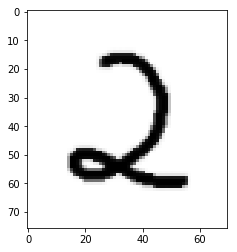

In [17]:
img_pred = cv2.imread("/home/anmol/Desktop/mnist/images/image3.png",0)
plt.imshow(img_pred, cmap='gray')

In [18]:
if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)
img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0

In [19]:
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], "Confidence is:", pred_proba)

(2, 'Confidence is:', '84.15%')
